### Este notebook se concentra em compilar os resultados de simulações das implementações do algoritmo SVM sem e com a utilização de tecnicas de feature scaling

In [19]:
#importação das bibliotecas
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, root_mean_squared_error

In [20]:
from utils.utils import *

#### Implementações sem utilização de feature scaling

In [21]:
df = pd.read_csv(r'data\opticalnetwork_dataset.csv')

array([[<Axes: title={'center': 'NumCh'}>,
        <Axes: title={'center': 'NumSpans'}>,
        <Axes: title={'center': 'DispPar'}>],
       [<Axes: title={'center': 'Spans_gamma'}>,
        <Axes: title={'center': 'Spans_beta2'}>,
        <Axes: title={'center': 'Spans_alpha'}>],
       [<Axes: title={'center': 'Spans_L'}>,
        <Axes: title={'center': 'Spans_PdBmCh'}>, <Axes: >]], dtype=object)

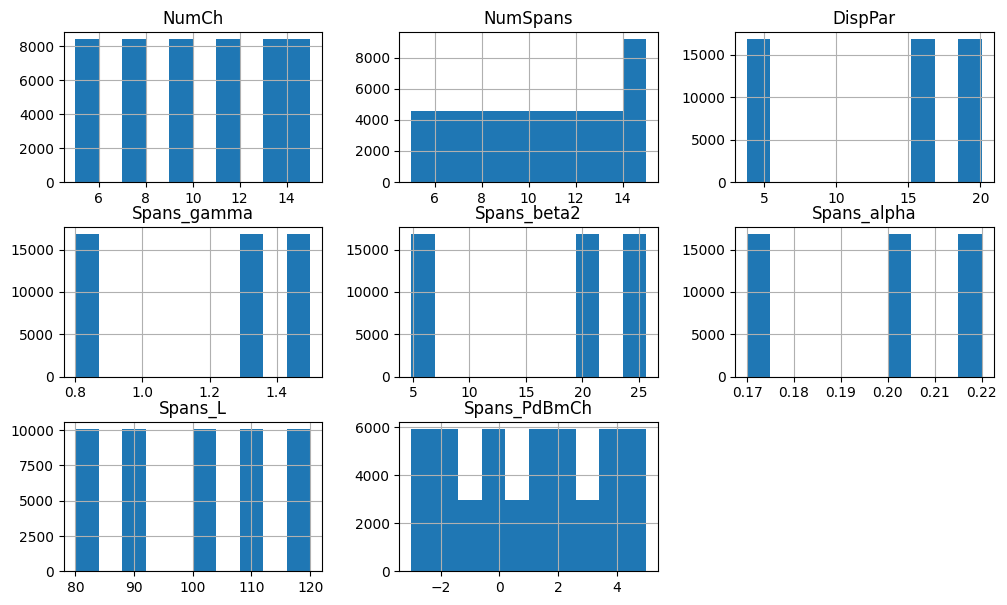

In [22]:
df[['NumCh', 'NumSpans', 'DispPar', 'Spans_gamma', 'Spans_beta2', 'Spans_alpha', 'Spans_L', 'Spans_PdBmCh']].hist(figsize=(12,7))

In [23]:
for channel in string_features:
  for key in coef_mod.keys():
    df[f'coef_mod_{channel}_{key}'] = df[channel].apply(lambda x: coef_mod[key][x])

In [24]:
df.Spans_Fn = df.Spans_Fn.apply(lambda x: 10*np.log10(x))

In [25]:
features = [feature for feature in df.columns if feature not in output_features+zero_features+string_features+const_input_features]

In [28]:
df_knn = df.copy()
X_features = df_knn[features].drop(columns=coef_mod0)
y_features = df_knn[output_features]
X_features.head()

,NumCh,NumSpans,DispPar,Spans_gamma,Spans_beta2,Spans_alpha,Spans_L,Spans_PdBmCh,coef_mod_Spans_ModFormatCh_1,coef_mod_Spans_ModFormatIntLeft_1,coef_mod_Spans_ModFormatIntRight_1
0,5,5,16.7,1.3,21.299985,0.2,80,-3.0,0.25,0.25,0.25
1,5,5,16.7,1.3,21.299985,0.2,80,-2.5,0.25,0.25,0.25
2,5,5,16.7,1.3,21.299985,0.2,80,-2.0,0.25,0.25,0.25
3,5,5,16.7,1.3,21.299985,0.2,80,-1.5,0.25,0.25,0.25
4,5,5,16.7,1.3,21.299985,0.2,80,-1.0,0.25,0.25,0.25


# Simulações sem feature scaling

### SVM - Kernel RBF: Estimação da Relação Sinal-Ruído com degradações não lineares (dB)

In [29]:
save_base_path = 'models/SVM/'

### Simulação Isolada

In [30]:
#Intancia do modelo
model_svmPoly_OSNRdB_NL = SVR(kernel = 'poly', degree=8, epsilon=0.01, coef0=1.25)

In [31]:
#Separação entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.3)

In [14]:
model_svmPoly_OSNRdB_NL.fit(X_train, y_train.OSNRdB_NL)
dump(model_svmPoly_OSNRdB_NL, save_base_path + 'modelo_SVMPOLY_OSNRdB_NL.joblib')

df_svmPoly_OSRNdBNL = y_test.copy()[['OSNRdB_NL']]
df_svmPoly_OSRNdBNL['OSNRdB_NL_pred'] = model_svmPoly_OSNRdB_NL.predict(X_test)

model_evaluation(df_svmPoly_OSRNdBNL['OSNRdB_NL_pred'], df_svmPoly_OSRNdBNL['OSNRdB_NL'], X_test)



{'R²': 0.99565,
 'R²a': 0.99565,
 'MSE': 0.06682,
 'RMSE': 0.25851,
 'MAE': 0.16151}

In [15]:
X_train.to_csv(r'data\SVMPOLYData\train_data/xOSNRNL_Train_data_svm_poly.csv')
X_test.to_csv(r'data\SVMPOLYData\test_data/xOSNRNL_Test_data_svm_poly.csv')
y_train.to_csv(r'data\SVMPOLYData\train_data/y_OSNRNL_Train_data_svm_poly.csv')
y_test.to_csv(r'data\SVMPOLYData\test_data/y_OSNRNL_Test_data_svm_poly.csv')

#### Validação Cruzada

In [17]:
model_svmPoly_OSNRdB_NL_cross_val = SVR(kernel = 'poly', degree=8, epsilon=0.01, coef0=1.25)

In [18]:
scores_cross_validation_SVMPOLY_OSNRdBNL = crossval_scores(model_svmPoly_OSNRdB_NL_cross_val, X_features, y_features.OSNRdB_NL)
scores_cross_validation_SVMPOLY_OSNRdBNL

Score for fold 1: {'R²': 0.99585, 'R²a': 0.99585, 'MSE': 0.06252, 'RMSE': 0.25005, 'MAE': 0.15746}
Score for fold 2: {'R²': 0.99622, 'R²a': 0.99622, 'MSE': 0.05796, 'RMSE': 0.24075, 'MAE': 0.15566}
Score for fold 3: {'R²': 0.99582, 'R²a': 0.99582, 'MSE': 0.06516, 'RMSE': 0.25527, 'MAE': 0.16006}
Score for fold 4: {'R²': 0.99584, 'R²a': 0.99584, 'MSE': 0.06453, 'RMSE': 0.25402, 'MAE': 0.16004}
Score for fold 5: {'R²': 0.99594, 'R²a': 0.99594, 'MSE': 0.06179, 'RMSE': 0.24858, 'MAE': 0.15669}


{'R²': [0.99585, 0.99622, 0.99582, 0.99584, 0.99594],
 'MAE': [0.15746, 0.15566, 0.16006, 0.16004, 0.15669],
 'MSE': [0.06252, 0.05796, 0.06516, 0.06453, 0.06179],
 'MEAN_MAE': 0.15798199999999998,
 'MEAN_MSE': 0.062392,
 'MEAN_R2': 0.9959340000000001}

### SVM Kernel Polinomial  - Estimação da Potência do ruído não linear (dB)


#### Simulação Isolada

In [32]:
model_svnPoly_regressor_NLIN = SVR(kernel = 'poly', degree=8, epsilon=0.01, coef0=1.25)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.3)
model_svnPoly_regressor_NLIN.fit(X_train, y_train.NLIN_Power)
dump(model_svnPoly_regressor_NLIN, save_base_path + 'modelo_SVMPOLY_NLIN.joblib')
df_svmPoly_NLIN = y_test.copy()[['NLIN_Power']]

In [34]:
df_svmPoly_NLIN['NLIN_Power_pred'] = model_svnPoly_regressor_NLIN.predict(X_test)
model_evaluation(df_svmPoly_NLIN['NLIN_Power_pred'], df_svmPoly_NLIN['NLIN_Power'], X_test)

{'R²': 0.9998, 'R²a': 0.9998, 'MSE': 0.01377, 'RMSE': 0.11733, 'MAE': 0.08105}

#### Validação Cruzada

In [35]:
svmPoly_regressor_NLIN_crossval = SVR(kernel = 'poly', degree=8, epsilon=0.01, coef0=1.25)

In [36]:
scores_cross_validation_SVMPOLY_NLIN = crossval_scores(svmPoly_regressor_NLIN_crossval, X_features, y_features.NLIN_Power)
scores_cross_validation_SVMPOLY_NLIN

Score for fold 1: {'R²': 0.99981, 'R²a': 0.99981, 'MSE': 0.01325, 'RMSE': 0.11511, 'MAE': 0.07948}
Score for fold 2: {'R²': 0.9998, 'R²a': 0.9998, 'MSE': 0.01438, 'RMSE': 0.1199, 'MAE': 0.08039}
Score for fold 3: {'R²': 0.99981, 'R²a': 0.99981, 'MSE': 0.0131, 'RMSE': 0.11448, 'MAE': 0.08027}
Score for fold 4: {'R²': 0.99981, 'R²a': 0.99981, 'MSE': 0.0137, 'RMSE': 0.11705, 'MAE': 0.08082}
Score for fold 5: {'R²': 0.99982, 'R²a': 0.99982, 'MSE': 0.01273, 'RMSE': 0.11282, 'MAE': 0.0788}


{'R²': [0.99981, 0.9998, 0.99981, 0.99981, 0.99982],
 'MAE': [0.07948, 0.08039, 0.08027, 0.08082, 0.0788],
 'MSE': [0.01325, 0.01438, 0.0131, 0.0137, 0.01273],
 'MEAN_MAE': 0.079952,
 'MEAN_MSE': 0.013432000000000003,
 'MEAN_R2': 0.9998100000000001}

# Simulações com feature scaling

#### Aplicação de métodos de normalização dos atributos e avaliação dos modelos.

In [37]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [38]:
X_features_scaled = X_features.copy()

In [39]:
X_features_scaled[X_features.columns] = scale.fit_transform(X_features)

### SVM Kernel Polinomial: Estimação da Relação Sinal-Ruído com degradações não lineares (dB)

#### Simulação Isolado

In [40]:
#Intancia do modelo
model_svmPoly_OSNRdB_NL_scaled = SVR(kernel = 'poly', degree=8, epsilon=0.01, coef0=1.25)

In [41]:
#Separação entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_features, test_size=0.3)
model_svmPoly_OSNRdB_NL_scaled.fit(X_train, y_train.OSNRdB_NL)
dump(model_svmPoly_OSNRdB_NL_scaled, save_base_path + 'modelo_SVMPOLY_OSNRdBNL_scaled.joblib')
df_svmPoly_OSNRdBNL_scaled = y_test.copy()[['OSNRdB_NL']]



In [42]:
df_svmPoly_OSNRdBNL_scaled['OSNRdB_NL_pred'] = model_svmPoly_OSNRdB_NL_scaled.predict(X_test)
model_evaluation(df_svmPoly_OSNRdBNL_scaled['OSNRdB_NL_pred'], df_svmPoly_OSNRdBNL_scaled['OSNRdB_NL'], X_test)

{'R²': 1.0, 'R²a': 1.0, 'MSE': 4e-05, 'RMSE': 0.00603, 'MAE': 0.00509}

In [43]:
X_train.to_csv(r'data\SVMPOLYData\train_data/xOSNRNL_scaled_Train_data_svm_poly.csv')
X_test.to_csv(r'data\SVMPOLYData\test_data/xOSNRNL_scaled_Test_data_svm_poly.csv')
y_train.to_csv(r'data\SVMPOLYData\train_data/y_OSNRNL_scaled_Train_data_svm_poly.csv')
y_test.to_csv(r'data\SVMPOLYData\test_data/y_OSNRNL_scaled_Test_data_svm_poly.csv')

#### Validação Cruzada

In [44]:
model_svmPoly_OSNRdB_NL_crossval_scaled = SVR(kernel = 'poly', degree=8, epsilon=0.01, coef0=1.25)

In [45]:

scores_cross_validation_svmPoly_OSNRdBNL_scaled = crossval_scores(model_svmPoly_OSNRdB_NL_crossval_scaled, X_features_scaled, y_features.OSNRdB_NL)
scores_cross_validation_svmPoly_OSNRdBNL_scaled

Score for fold 1: {'R²': 1.0, 'R²a': 1.0, 'MSE': 3e-05, 'RMSE': 0.00588, 'MAE': 0.00498}
Score for fold 2: {'R²': 1.0, 'R²a': 1.0, 'MSE': 4e-05, 'RMSE': 0.00602, 'MAE': 0.00507}
Score for fold 3: {'R²': 1.0, 'R²a': 1.0, 'MSE': 4e-05, 'RMSE': 0.00596, 'MAE': 0.00503}
Score for fold 4: {'R²': 1.0, 'R²a': 1.0, 'MSE': 3e-05, 'RMSE': 0.0059, 'MAE': 0.00497}
Score for fold 5: {'R²': 1.0, 'R²a': 1.0, 'MSE': 4e-05, 'RMSE': 0.00596, 'MAE': 0.00502}


{'R²': [1.0, 1.0, 1.0, 1.0, 1.0],
 'MAE': [0.00498, 0.00507, 0.00503, 0.00497, 0.00502],
 'MSE': [3e-05, 4e-05, 4e-05, 3e-05, 4e-05],
 'MEAN_MAE': 0.005013999999999999,
 'MEAN_MSE': 3.6e-05,
 'MEAN_R2': 1.0}

### SVM Kernel Polinomial - Estimação da Potência do ruído não linear (dB)



#### Simulação Isolada

In [46]:
model_svmPoly_NLIN_scaled = SVR(kernel = 'poly', degree=8, epsilon=0.01, coef0=1.25)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_features, test_size=0.3)
model_svmPoly_NLIN_scaled.fit(X_train, y_train.NLIN_Power)
dump(model_svmPoly_NLIN_scaled, save_base_path + 'modelo_SVMPOLY_NLIN_scaled.joblib')




['modelos/SVMPOLY/modelo_SVMPOLY_NLIN_scaled.joblib']

In [48]:
df_svmPoly_NLIN_scaled = y_test.copy()[['NLIN_Power']]
df_svmPoly_NLIN_scaled['NLIN_Power_pred'] = model_svmPoly_NLIN_scaled.predict(X_test)
model_evaluation(df_svmPoly_NLIN_scaled['NLIN_Power_pred'], df_svmPoly_NLIN_scaled['NLIN_Power'], X_test)

{'R²': 1.0, 'R²a': 1.0, 'MSE': 9e-05, 'RMSE': 0.00945, 'MAE': 0.00727}

### save train test data

In [49]:
X_train.to_csv(r'data\SVMPOLYData\train_data/x_NLIN_Train_data_scaled_svm_poly.csv')
X_test.to_csv(r'data\SVMPOLYData\train_data/x_NLIN_Test_data_scaled_svm_poly.csv')
y_train.to_csv(r'data\SVMPOLYData\train_data/y_NLIN_Train_data_scaled_svm_poly.csv')
y_test.to_csv(r'data\SVMPOLYData\train_data/y_NLIN_Test_data_scaled_svm_poly.csv')

#### Validação Cruzada

In [50]:
svmPoly_regressor_NLIN_crossval_scaled = SVR(kernel = 'poly', degree=8, epsilon=0.01, coef0=1.25)

In [51]:

scores_cross_validation_svmPoly_NLIN_scalrd = crossval_scores(svmPoly_regressor_NLIN_crossval_scaled, X_features_scaled, y_features.NLIN_Power)
scores_cross_validation_svmPoly_NLIN_scalrd

Score for fold 1: {'R²': 1.0, 'R²a': 1.0, 'MSE': 9e-05, 'RMSE': 0.00938, 'MAE': 0.00721}
Score for fold 2: {'R²': 1.0, 'R²a': 1.0, 'MSE': 9e-05, 'RMSE': 0.00929, 'MAE': 0.00716}
Score for fold 3: {'R²': 1.0, 'R²a': 1.0, 'MSE': 9e-05, 'RMSE': 0.00932, 'MAE': 0.00716}
Score for fold 4: {'R²': 1.0, 'R²a': 1.0, 'MSE': 9e-05, 'RMSE': 0.00926, 'MAE': 0.00707}
Score for fold 5: {'R²': 1.0, 'R²a': 1.0, 'MSE': 9e-05, 'RMSE': 0.00932, 'MAE': 0.00719}


{'R²': [1.0, 1.0, 1.0, 1.0, 1.0],
 'MAE': [0.00721, 0.00716, 0.00716, 0.00707, 0.00719],
 'MSE': [9e-05, 9e-05, 9e-05, 9e-05, 9e-05],
 'MEAN_MAE': 0.007158,
 'MEAN_MSE': 9e-05,
 'MEAN_R2': 1.0}